# 画像データ拡張ライブラリ-albumentations-

## 参考
1. https://github.com/albumentations-team/albumentations
2. https://qiita.com/Takayoshi_Makabe/items/79c8a5ba692aa94043f7
3. http://ni4muraano.hatenablog.com/entry/2018/11/21/000727

In [1]:
import albumentations

In [7]:
import os, sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
import albumentations as albu

In [8]:
IMG_DIR = './Image_sample/'

## cv2

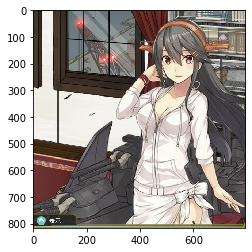

In [9]:
img = cv2.imread(IMG_DIR+'haruna_kankore.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

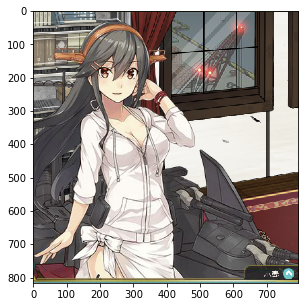

In [15]:
img = albu.HorizontalFlip(p=1)(image=img)['image']

plt.figure(figsize=(8, 5))
plt.imshow(img);

In [33]:
def showing(transforms):
    
    img_origin = cv2.imread(IMG_DIR+'haruna_kankore.png')
    img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
    
    img = img_origin.copy()
    augmented = transforms(image=img)
    img = augmented['image']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].imshow(img_origin)
    axes[1].imshow(img);

## Compose

In [35]:
def get_augmentation():
    train_transform = [
        albu.HorizontalFlip(p=1),
        albu.VerticalFlip(p=1),
    ]
    return albu.Compose(train_transform)


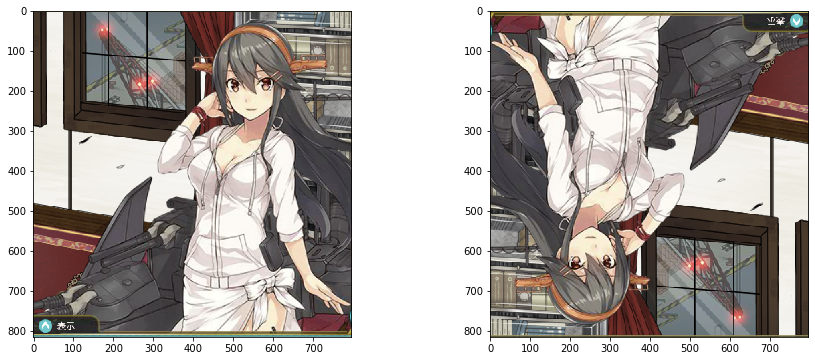

In [36]:
showing(get_augmentation())

## OneOf

In [31]:
def get_augmentation():
    train_transform = [
        albu.HorizontalFlip(p=1),
        albu.VerticalFlip(p=1),
    ]
    return albu.OneOf(train_transform)

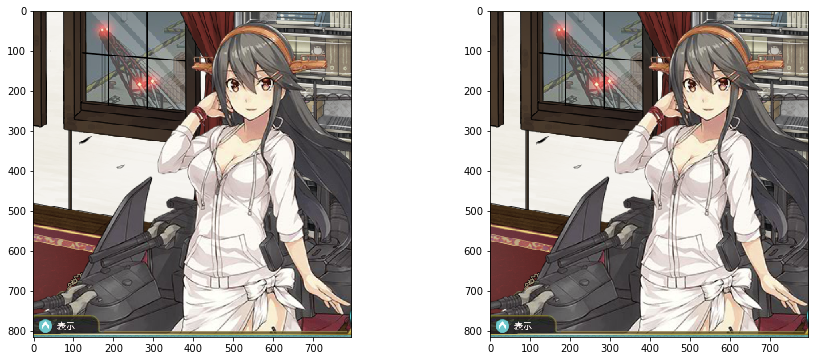

In [32]:
showing(get_augmentation())